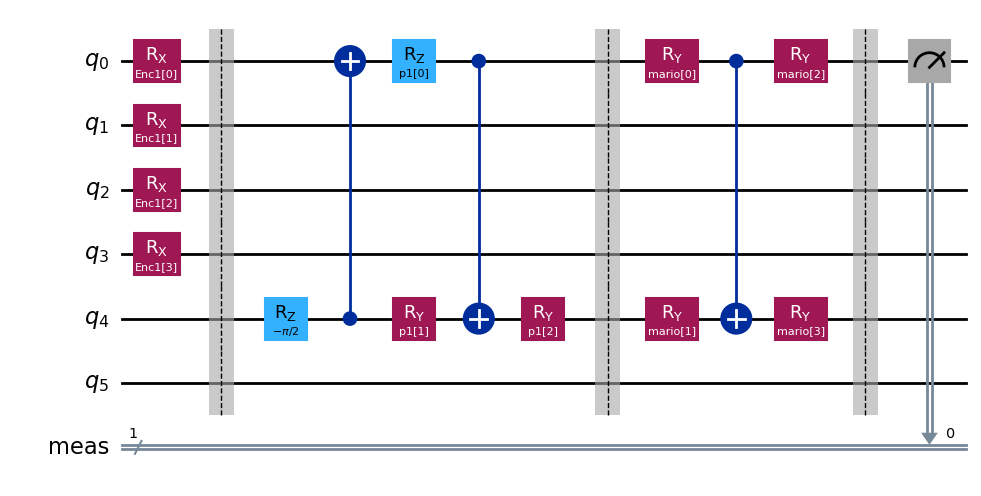

QiskitMachineLearningError: 'Invalid input dimension! Received torch.Size([129, 8]) and expected input compatible to 4'

In [15]:
from triqlet.quantum.models import QuantumSamplerModel
from triqlet.quantum.layers import *
import torch


encoder = EncoderLayer(6, [0,1,2,3], 4 , "Enc1", "x")

ansatz = QuantumSequential(
    PoolingLayer(6, [0], [4], "p1", "mario" ),
    RealAmplitudeLayer(6, [0,4], "full", 1, "mario" , "ddsfsdf")

)


a = QuantumSamplerModel(
    circ_qubits=6,
    encoder= encoder,
    ansatz= ansatz,
    shots=100,
    measurement=[0]
)

a.draw(decompose=True)


a(torch.rand((129, 8)))



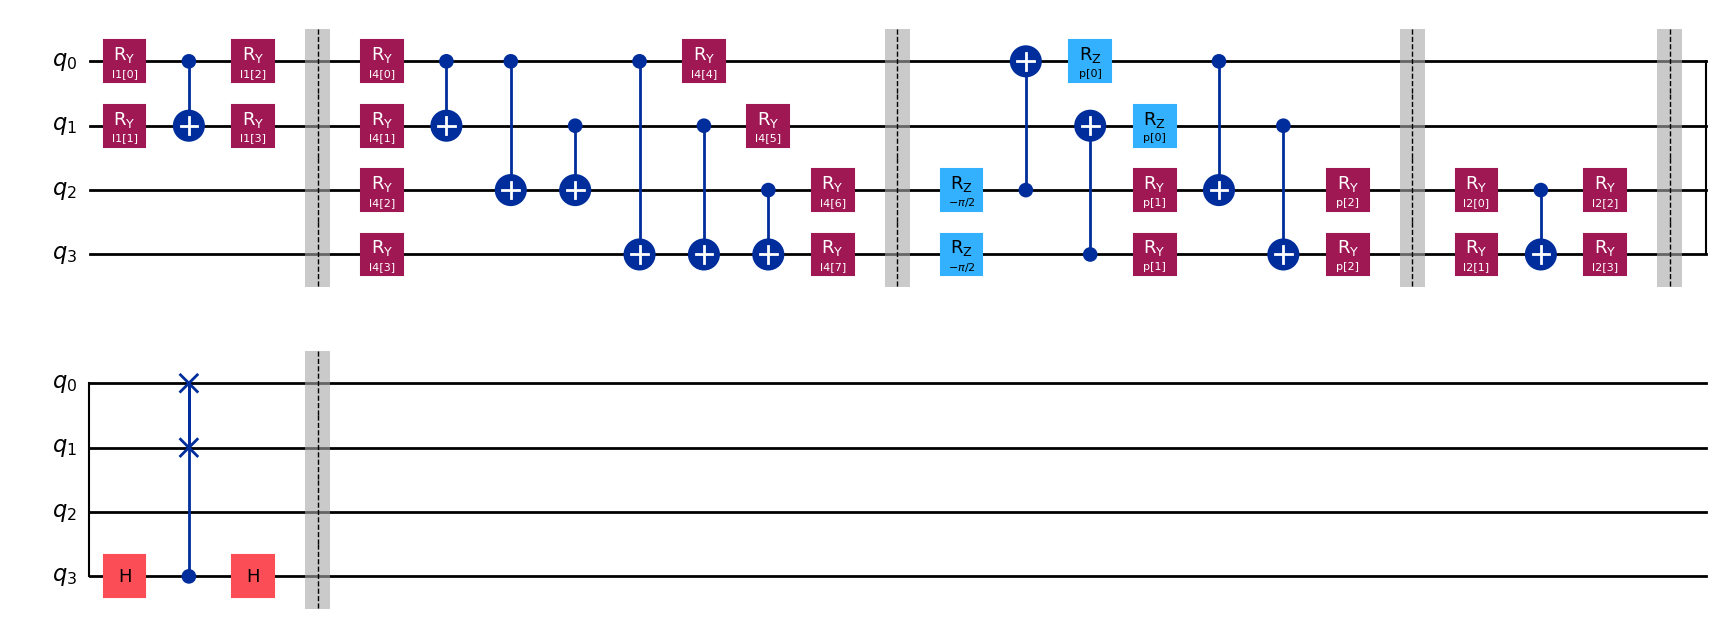

In [28]:
QuantumSequential(
    RealAmplitudeLayer(4, [0,1], "full", 1, "l1", "L1" ),
    RealAmplitudeLayer(4, [0,1,2,3], "full", 1, "l4", "L1" ),
    PoolingLayer(4, [0,1], [2,3], "p", "P1"),
    RealAmplitudeLayer(4, [2,3], "full", 1, "l2", "L2" ),
    SwapTestLayer(4, [0], [1], 3, "mario" )
).decompose().draw("mpl")
